# Learning a decision tree from data

We'll always begin with importing packages.

In [1]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')

Recall the automobile MPG dataset? Because its familiar, let's reuse it here.

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                'model', 'origin', 'car_name']

mpg_df = pd.read_csv(url,
                     delim_whitespace=True,
                     header=None,
                     names=column_names).dropna()

In [3]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## A simple classification problem

Let's try a simple classification problem, whether a car gets good milage (high MPG) or not

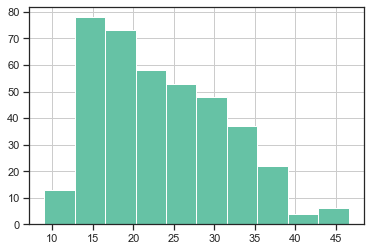

In [4]:
mpg_df["mpg"].hist()

Arbitrarily, let's say that those cars with a MPG greater than the median get good miles per gallon. 

In [6]:
# find the median
median_mpg = mpg_df["mpg"].median()

# print the median
print("the median MPG is: %s" % median_mpg)

# To do operations on an entire column in pandas, the following is a best practice:

# 1. we define a function of the operations we want to do
def is_high_mpg(mpg):
    return 1 if mpg > median_mpg else 0

# 2. we then apply this function over the every single row of a column ("mpg")
#    and we save the output as a new column ("is_high_mpg")
mpg_df["is_high_mpg"] = mpg_df["mpg"].apply(is_high_mpg)

# let's see the result
mpg_df.iloc[:20]

the median MPG is: 22.75


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,is_high_mpg
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500,0
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala,0
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii,0
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina,0
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl,0


We'd like to use information contained in the other automobile quantities to predict whether or not the car is efficient. 

# Build a decision tree

We will use Sklearn's implementation 

In [7]:
from sklearn.tree import DecisionTreeClassifier

predictor_cols = ["weight", "acceleration", "acceleration", "cylinders", "displacement"]

# Let's define the model (tree)
decision_tree = DecisionTreeClassifier(max_depth=3, criterion="entropy")   # Look at those 2 arguments !!! 

# Let's tell the model what is the data
decision_tree.fit(mpg_df[predictor_cols], mpg_df["is_high_mpg"])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

We now have a classifier tree, let's visualize the results! (to get this to work, create a directory called "images" in the same directory you are running this script from)

In [8]:
from IPython.display import Image

from sklearn.tree import export_graphviz

def visualize_tree(decision_tree, feature_names, class_names, directory="./images", name="tree",proportion=True):
    
    # Export our decision tree to graphviz format
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,
                               feature_names=feature_names, class_names=class_names,proportion=proportion)
        
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    os.system("dot -Tpng %s -o %s" % (dot_name, image_name))
    # to get this part to actually work, you may need to open a terminal window in Jupyter and run the following command "sudo apt install graphviz"
    
    # Return the .png image so we can see it
    return Image(filename=image_name)

visualize_tree(decision_tree, predictor_cols, ["n", "y"])

FileNotFoundError: [Errno 2] No such file or directory: './images/tree.dot'

Let's look at the `"acceleration"`,  `"weight"`, including the **DECISION SURFACE!!**

More details for this graph: [sklearn decision surface](http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html)

How good is our model? Let's compute accuracy, the percent of times where we correctly identified that a car was high MPG.

In [9]:
# get some predictions from the model
preds = decision_tree.predict(mpg_df[predictor_cols])

predictions_mpg_df = mpg_df.assign(predictions=preds)

predictions_mpg_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,is_high_mpg,predictions
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0,0


In [10]:
from sklearn import metrics
print ( "Accuracy = %.3f" % (metrics.accuracy_score(predictions_mpg_df["predictions"], predictions_mpg_df["is_high_mpg"])) )

Accuracy = 0.906
